<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_8_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. BaggingClassifier

위스콘신 유방암 진단 데이터세트를 사용해 종양을 예측하는 분류분석을 수행해보자.

In [1]:
import pandas as pd

breast = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
breast.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
breast.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
# id는 필요없고, diagnosis는 Malignant을 1, Benign을 0으로 매핑해보자
breast = breast.drop(columns = ('id'))
breast['diagnosis'] = breast['diagnosis'].map({'M' : 1, 'B' : 0})
breast.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


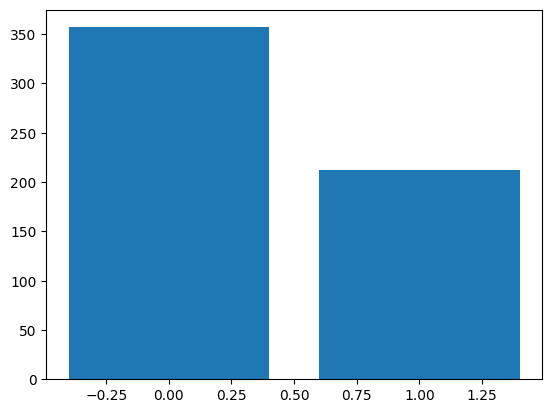

In [6]:
# malignant와 begign이 각각 몇개씩 있는지 boxblot으로 확인해보자
import matplotlib.pyplot as plt
data_cnt = breast['diagnosis'].value_counts()
plt.bar(data_cnt.index, data_cnt.values, width = 0.8, align = 'center')
plt.show()

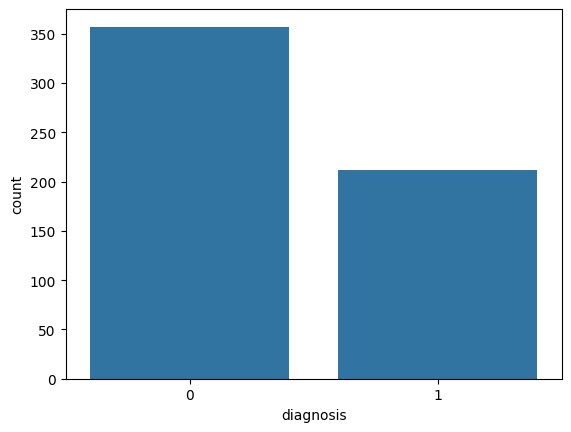

In [7]:
# seaborn을 활용하면 좀 더 깔끔하다
import seaborn as sns
plt.figure()
sns.countplot(x = 'diagnosis', data = breast)
plt.show()

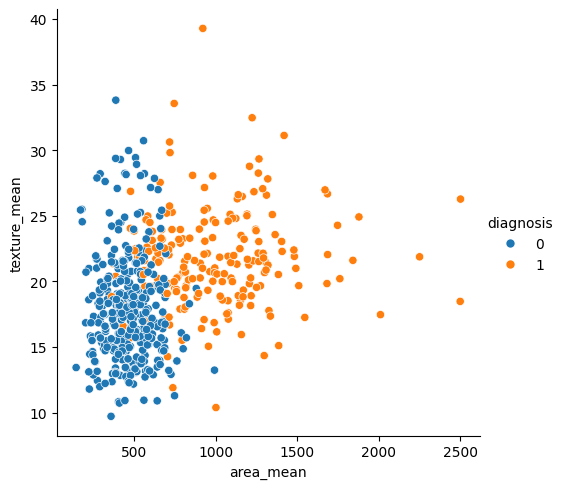

In [8]:
# 분석을 위해 breast 데이터세트 중 설명변수를 area_mean, texture_mean로 설정하고
# 타깃변수를 diagnosis로 설정해보자.
sns.relplot(x = 'area_mean', y = 'texture_mean', hue = 'diagnosis', data = breast)
plt.show()

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
features = ['area_mean', 'area_worst']
X = breast[features]
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape)

(398, 2)


In [10]:
# BaggingClassifier를 사용해 분류기를 생성하여 예측을 수행해보자.
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier() # 자동으로 base estimator는 DecisoinTreeClassifier()가 된다
pred = clf.fit(X_train,y_train).predict(X_test)
print('Accuracy Score :', clf.score(X_test, y_test))

Accuracy Score : 0.9298245614035088


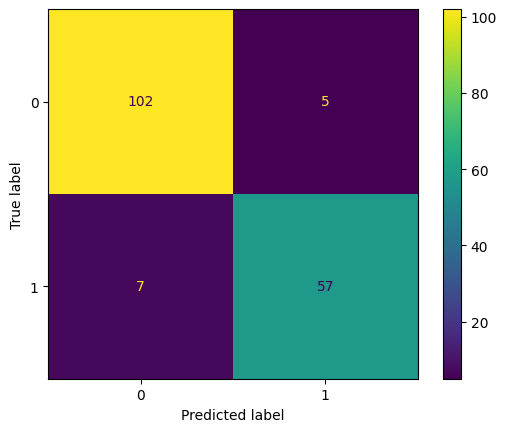

In [11]:
# 혼동행렬을 반환해 예측결과를 보다 자세하게 확인해보자
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

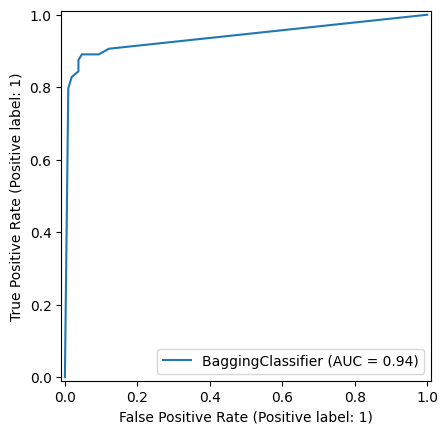

In [12]:
# ROC곡선을 그리고 AUC값을 계산해보자
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [13]:
# oob_score를 사용해 모델을 평가해보자.
# oob_score를 사용할 경우 검증세트나 교차검증을 하지 않아도 된다는 장점이 있다.
clf_oob = BaggingClassifier(oob_score = True)

oob = clf_oob.fit(X,y).oob_score_
print(oob)

0.9191564147627417


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


# 2. BaggingRegressor
캐글의 자동차 데이터세트를 사용해 자동차의 가격을 예측해보자.  


In [14]:
import pandas as pd

car = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
car['curbweight']

,curbweight
0,2548
1,2548
2,2823
3,2337
4,2824
...,...
200,2952
201,3049
202,3012
203,3217


In [17]:
car.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [18]:
car[['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## BaggingRegressor vs. ElasticNet

연속형 변수들만 종속변수로 가지는 BaggingRegressor와
연속형 변수들을 labelEncoder를 통해 실수화 한 후의 ElasticNet모델과의 비교를 진행해보자

In [19]:
# 먼저 BaggingRegressor먼저 구현해보자

car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

X = car_num[features]
y = car['price']

print(X.shape, y.shape)

(205, 13) (205,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [21]:
from sklearn.ensemble import BaggingRegressor
breg = BaggingRegressor(oob_score = True).fit(X_train,y_train)
bpred = breg.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae1 = mean_absolute_error(y_test, bpred)
mse1 = mean_squared_error(y_test, bpred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, bpred)

print(mae1,"\t", mse1, "\t", rmse1, '\t', r2_1)

1483.2913973118282 	 4876600.030164212 	 2208.3025223379636 	 0.9192222965546163


In [23]:
print(breg.oob_score_)

0.8858448818317324


In [24]:
# 이제 ElasticNet을 구현해보자
# 먼저 데이터 실수화를 진행한다
from sklearn.preprocessing import LabelEncoder

car_en = car.copy()

le = LabelEncoder()

categorical_columns = car_en.select_dtypes(include = ['object']).columns

# doornumber와 cylindernumber는 따로 처리해준다
categorical_columns = categorical_columns.difference(['doornumber','cylindernumber'])

for col in categorical_columns:
  car_en[col] = le.fit_transform(car_en[col])

In [25]:
print(car_en['doornumber'].unique())
print(car_en['cylindernumber'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [26]:
car_en['doornumber'] = car_en['doornumber'].map({"two" : 2, "four" : 4})
car_en['cylindernumber'] = car_en['cylindernumber'].map({"two" : 2, "three" : 3, "four" : 4, "five" : 5, "six" : 6,
                                                 "eight" : 8, "twelve" : 12})

In [27]:
features = list(car_en.columns.difference(['car_ID','symboling', 'price']))
X = car_en[features]
y = car_en['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print(X_train.shape)

(143, 23)


In [29]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(random_state = 45)
ela.fit(X_train,y_train)
epred = ela.predict(X_test)

mae2 = mean_absolute_error(y_test, epred)
mse2 = mean_squared_error(y_test, epred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, epred)
print(mae2,"\t", mse2, "\t", rmse2, '\t', r2_2)
# 결과적으로 BaggingRegressor가 ElasticNet보다 더 좋은 성능을 보인다.

2347.7535042582685 	 10110270.336217232 	 3179.6651295721745 	 0.8325299565434906


In [30]:
# 만약 똑같은 X_train을 BaggingRegressor에 적용시킨다면?
breg = BaggingRegressor(oob_score = True).fit(X_train,y_train)
bpred = breg.predict(X_test)


mae1 = mean_absolute_error(y_test, bpred)
mse1 = mean_squared_error(y_test, bpred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, bpred)

print(mae1,"\t", mse1, "\t", rmse1, '\t', r2_1)
print(breg.oob_score_)
# 오히려 성능이 안좋아졌지만, 그래도 ElasticNet보다 좋다

1372.064516129032 	 4119240.820967742 	 2029.59129407074 	 0.9317674585985993
0.908790768600387


# 4. AdaBoostClassifier
배깅에서 수행한 유방암 데이터로 부스팅을 수행해보자.  


In [31]:
features = ['area_mean', 'area_worst']
X = breast[features]
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 1)

In [32]:
# AdaBoostClassifier를 생성하여 학습시켜보자
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 1)
pred = clf.fit(X_train, y_train).predict(X_test)
print(" 정확도 : ", clf.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 정확도 :  0.935672514619883


정확도 	 93.57%
정밀도 	 96.49%
재현율 	 85.94%
F1 	 90.91%


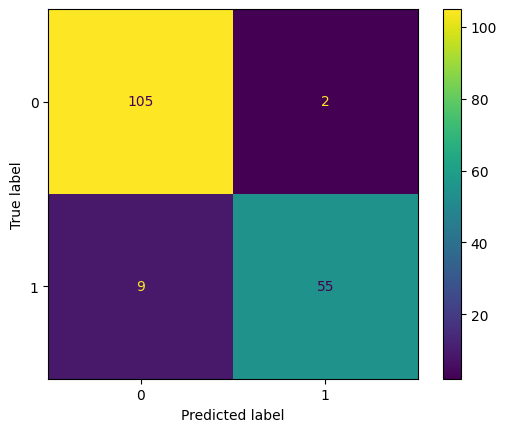

In [36]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("정확도 \t {}%".format(round(acc*100,2)))
print("정밀도 \t {}%".format(round(prc*100,2)))
print("재현율 \t {}%".format(round(rcll*100,2)))
print("F1 \t {}%".format(round(f1*100,2)))

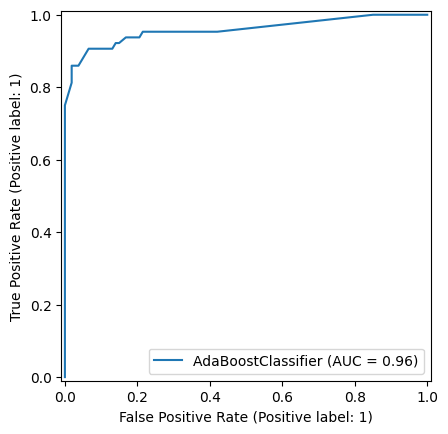

In [37]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [38]:
# 변수 중요도 예측을 통해
# 사용된 변수들 중 타깃변수에 영향을 가장 많이 준 변수가 무엇인지 살펴보자

importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importances = pd.concat([column_nm,pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.42
1  texture_mean         0.58


<BarContainer object of 2 artists>

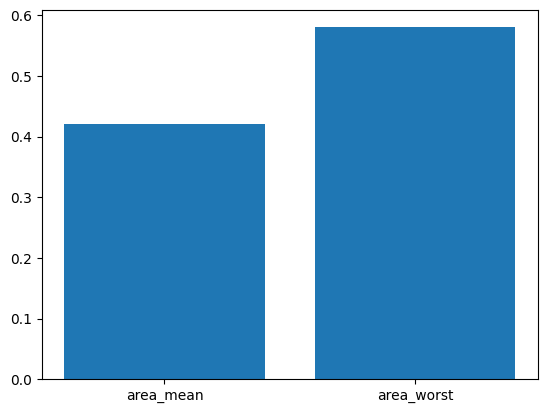

In [39]:
# 막대그래프로 시각화할 수 있음
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position,f)
plt.bar(xtick_label_position, importances)

# AdaBoostRegressor
자동차 가격 데이터로 부스팅을 수행해보자

In [75]:
car = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [76]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [77]:
# 먼저 int64형 데이터들은 float64로 바꾸어 주고,
# 수치형 데이터가 아닌 데이터들은 labelencoder 혹은 ordinalencoder를 수행해준다.

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
df_car_integer = car.select_dtypes(include = ['int64'])

columns_integer = df_car_integer.columns
# columns_integer = df_car_integer.drop('car_ID', axis = 1).columns

print(columns_integer)
df_car_object = car.select_dtypes(include = ['object'])
columns_object = df_car_object.columns
columns_object

Index(['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [78]:
# int64 -> float64
car[columns_integer] = car[columns_integer].astype(np.float64)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

In [79]:
# labelEncode할 column들
columns1 = columns_object.difference(['doornumber','cylindernumber'])

le = LabelEncoder()
for c in columns1:
  car[c] = le.fit_transform(car[c])
  car[c] = car[c].astype(np.float64)

# doornumber와 cylindernumber는 따로 처리해준다
car['doornumber'] = car['doornumber'].map({"two" : 2., "four" : 4.})
car['cylindernumber'] = car['cylindernumber'].map({"two" : 2., "three" : 3., "four" : 4., "five" : 5., "six" : 6.,
                                                 "eight" : 8., "twelve" : 12.})

In [80]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [101]:
X = car[car.columns.difference(['car_ID','price'])]
y = car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [102]:
# AdaBoostRegressor를 이용해 회귀분석을 수행해보자.
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor()
pred = reg.fit(X_train,y_train).predict(X_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test, y_test)

print(mae,"\t", mse, "\t", rmse, '\t', acc)

1819.1329698208892 	 5770320.20442366 	 2402.149080391069 	 0.9044184039341556


In [107]:
# 예측에 사용된 변수들 중 타깃변수에 영향을 가장 많이 준 변수가 무엇인지 살펴보자
importances = reg.feature_importances_
features = X.columns
column_nm = pd.DataFrame(features)

feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm','importances']
feature_importances.sort_values(by = 'importances', ascending=False, inplace = True)
feature_importances.reset_index(drop = True, inplace = True)
feature_importances

,feature_nm,importances
0,enginesize,6.530398e-01
1,horsepower,7.480834e-02
2,curbweight,6.766328e-02
3,carwidth,5.913864e-02
4,highwaympg,4.432641e-02
5,wheelbase,2.696380e-02
6,fuelsystem,1.857813e-02
7,boreratio,1.785513e-02
8,citympg,8.069300e-03
9,compressionratio,7.491288e-03


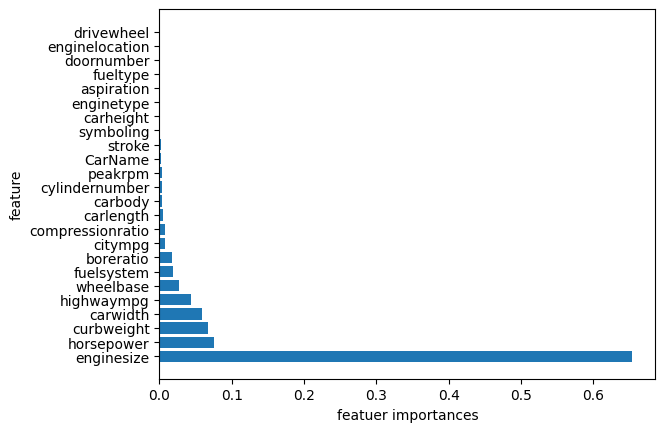

In [109]:
# 변수중요도를 막대그래프로 시각화해보자

plt.barh(feature_importances['feature_nm'], feature_importances['importances'])
plt.xlabel('featuer importances')
plt.ylabel('feature')
plt.show()

# RandomForestClassifier
배깅에서 수행한 유방암 데이터로 부스팅을 수행해보자.

In [110]:
breast

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [111]:
features = ['area_mean', 'texture_mean']

X = breast[features]
y = breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape)

(398, 2)


In [118]:
# RandomForestClassifier로 모델을 생성한 뒤, fit 메서드로 학습하고 predict 메서드로 예측값을 pred에 저장한다
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, random_state=1)
pred = clf.fit(X_train, y_train).predict(X_test)
print('정확도 : ', clf.score(X_test, y_test))

정확도 :  0.8947368421052632


0.85


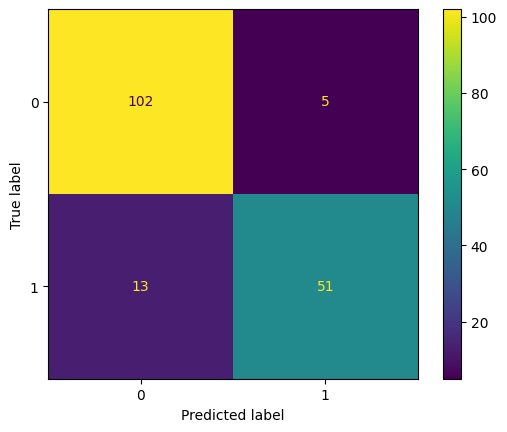

In [121]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

test_acc = accuracy_score(y_test,pred)
test_f1 = f1_score(y_test, pred)
print(test_f1)

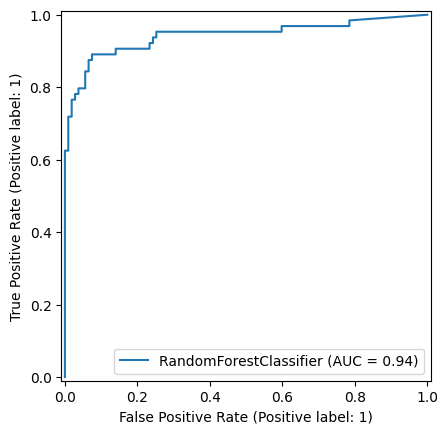

In [123]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [128]:
# 변수중요도를 통해 예측에 사용된 변수들 중 타깃변수에 영향을 가장 많이 준 변수가 무엇인지 살펴보자
importances = clf.feature_importances_

column_nm = X.columns

feature_importances = pd.concat([pd.DataFrame(column_nm), pd.DataFrame(importances)],axis = 1)
feature_importances.columns = ['feature_nm','importances']

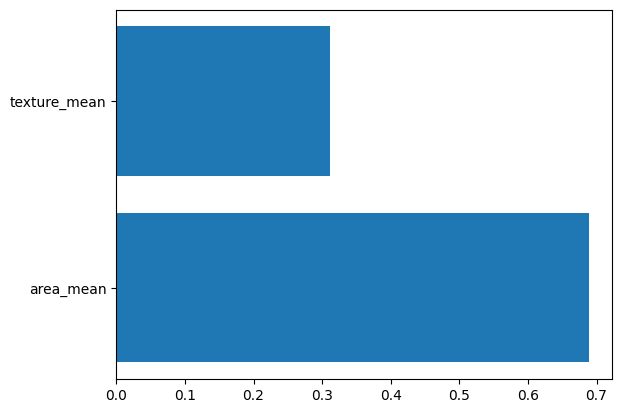

In [130]:
plt.barh(feature_importances['feature_nm'], feature_importances['importances'])
plt.show()

# RandomForestRegressor

In [132]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    float64
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    float64
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    float64
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    float64
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    float64
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [135]:
features = car.columns.difference(['car_ID','price'])
X = car[features]
y = car['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [137]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
pred = reg.fit(X_train, y_train).predict(X_test)

mae = mean_absolute_error(y_test, epred)
mse = mean_squared_error(y_test, epred)
rmse = np.sqrt(mse2)
acc = reg.score(X_test, y_test)

print(mae, mse, rmse, acc, sep = '\n')

2347.7535042582685
10110270.336217232
3179.6651295721745
0.9303104806917952


<BarContainer object of 24 artists>

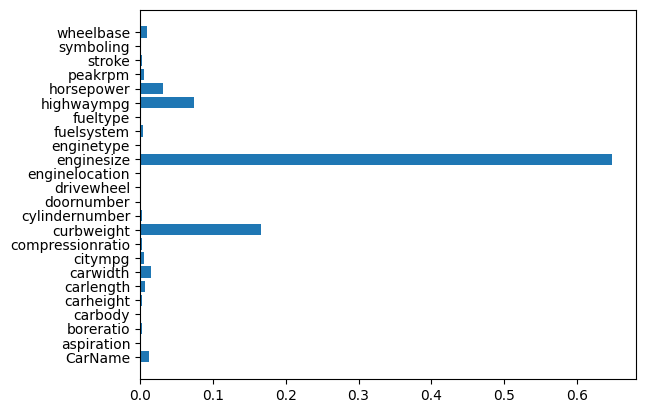

In [139]:
# 변수중요도 확인
importances = reg.feature_importances_
column_nm = X.columns

feature_importances = pd.concat([pd.DataFrame(column_nm), pd.DataFrame(importances)], axis = 1)

feature_importances.columns = ['feature_nm', 'importances']

plt.barh(feature_importances['feature_nm'], feature_importances['importances'])